In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec

warnings.filterwarnings("ignore", category=FutureWarning)

# Identificacion de regiones conservadas

In [2]:
def delete_path(string):
    if '/' in string:
        x = string.split('/')[1]
        if 'human' in x: 
            return x.split('_human')[0]
    else:
        return string
    
# global
df = pd.read_csv('../Data/ProcessingServer/entropy_Human.tsv', sep = '\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.replace({'BloqueHuman/':'Global'}, inplace = True)
df5 = df[df['Region'] == "5'UTR"]
df3 = df[df['Region'] == "3'UTR"]

#por variantes
df_v = pd.read_csv('../Data/ProcessingServer/raw_data_entropy_variants.tsv', sep = '\t')
df_v.drop(['Unnamed: 0'], axis=1, inplace=True)

df5_v = df_v[df_v['Region'] == "5'UTR"]
df3_v = df_v[df_v['Region'] == "3'UTR"]

#por tiempo
df_t = pd.read_csv('../Data/ProcessingServer/raw_data_entropy_temporal.tsv', sep = '\t')
df_t.drop(['Unnamed: 0'], axis=1, inplace=True)

df5_t = df_t[df_t['Region'] == "5'UTR"]
df3_t = df_t[df_t['Region'] == "3'UTR"]

#df5 = pd.concat([df5, df5_v, df5_t])
#df3 = pd.concat([df3, df3_v, df3_t])

df5v = pd.concat([df5, df5_v])
df3v = pd.concat([df3, df3_v])

df5v['Variant'] = list(map(delete_path, df5v['Variant']))
df3v['Variant'] = list(map(delete_path, df3v['Variant']))


df5t = pd.concat([df5, df5_t])
df3t = pd.concat([df3, df3_t])
df5t['Variant'] = list(map(delete_path, df5t['Variant']))
df3t['Variant'] = list(map(delete_path, df3t['Variant']))

df5t

,Site,H,Region,Variant
0,1,0.597737,5'UTR,Global
1,2,0.325213,5'UTR,Global
2,3,0.219767,5'UTR,Global
3,4,0.381892,5'UTR,Global
4,5,0.239893,5'UTR,Global
...,...,...,...,...
269396,261,-0.0,5'UTR,"(2023-07-01,2023-09-06]"
269397,262,-0.0,5'UTR,"(2023-07-01,2023-09-06]"
269398,263,-0.0,5'UTR,"(2023-07-01,2023-09-06]"
269399,264,0.00404063768880186,5'UTR,"(2023-07-01,2023-09-06]"


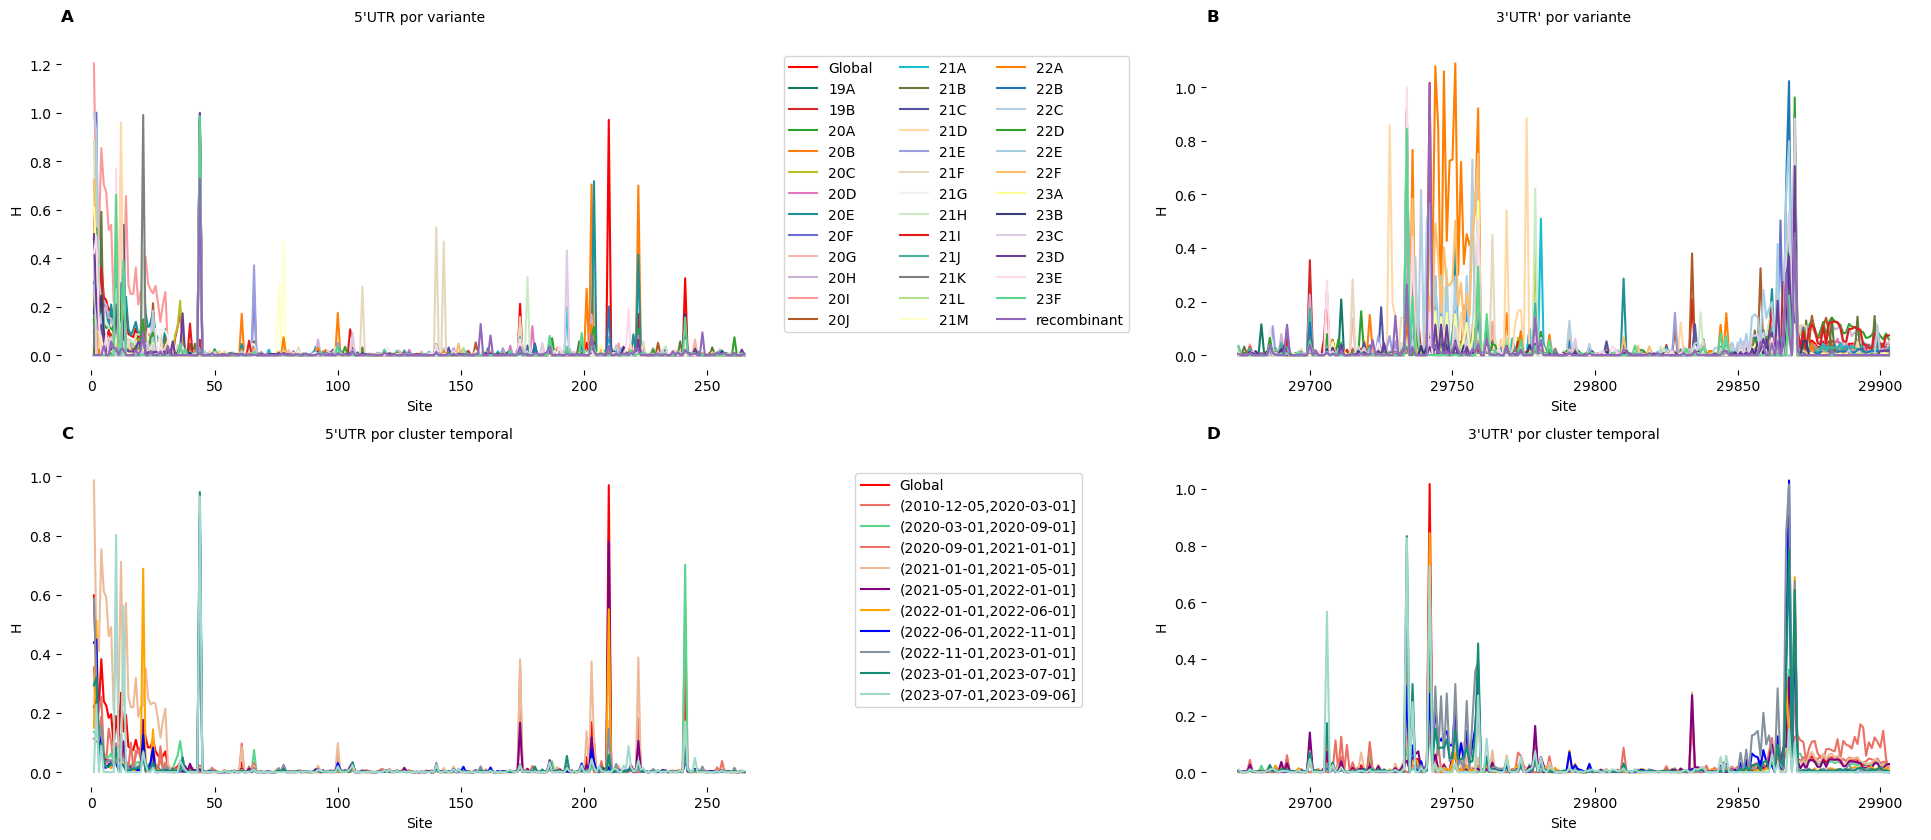

In [3]:
colores = {
    'Global': 'red',
    'nan': 'gray',
    np.nan : '#535F68',
    '19A': '#117A65',
    '20B': '#ff7f0e',
    '20A': '#2ca02c',
    '19B': '#d62728',
    'recombinant': '#9467bd',
    '21J': '#45B39D',
    '20D': '#e377c2',
    '21K': '#7f7f7f',
    '20C': '#bcbd22',
    '21A': '#17becf',
    '20E': '#1c9099',
    '22E': '#a6cee3',
    '22B': '#1f78b4',
    '21L': '#b2df8a',
    '22D': '#33a02c',
    '20I': '#fb9a99',
    '21I': '#e31a1c',
    '22F': '#fdbf6f',
    '22A': '#ff7f00',
    '20H': '#cab2d6',
    '23D': '#6a3d9a',
    '23A': '#ffff99',
    '20J': '#b15928',
    '20G': '#fbb4ae',
    '22C': '#b3cde3',
    '21H': '#ccebc5',
    '23C': '#decbe4',
    '21D': '#fed9a6',
    '21M': '#ffffcc',
    '21F': '#e5d8bd',
    '23E': '#fddaec',
    '21G': '#f2f2f2',
    '23B': '#393b79',
    '21C': '#5254a3',
    '20F': '#6b6ecf',
    '21E': '#9c9ede',
    '21B': '#637939',
    '23F': '#58D68D',
    '(2010-12-05,2020-03-01]': '#EC7063',
    '(2020-03-01,2020-09-01]': '#58D68D',
    '(2020-09-01,2021-01-01]': '#EC7063',
    '(2021-01-01,2021-05-01]': "#EDBB99",
    '(2021-05-01,2022-01-01]': "purple",
    '(2022-01-01,2022-06-01]': "orange",
    '(2022-06-01,2022-11-01]': "blue",
    '(2022-11-01,2023-01-01]': "#85929E",
    '(2023-01-01,2023-07-01]': "#138D75",
    '(2023-07-01,2023-09-06]': '#A2D9CE'
}

fig = plt.figure(figsize=(24, 15))
gs = gridspec.GridSpec(3, 2, height_ratios=[5,5,5], width_ratios=[12,12])
#gs = gridspec.GridSpec(2, 2)

#===================================== First plot on the top =============================
#ax1 = fig.add_subplot(gs[0, 0:2])
#ax1 = sns.lineplot(data=df, x="Site", y='H', hue = 'Region', palette = 'Set2')

#ax1.set_title('A', fontweight='bold', loc = 'left')
#ax1.set_title('Todas las muestras', fontsize=10, pad=20)

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(ncol=2)
#sns.despine(left=True, bottom=True)

#===================================== second plot on the top =============================
ax2 = fig.add_subplot(gs[1, 0])
ax2 = sns.lineplot(data=df5v, x="Site", y='H', hue = 'Variant', palette = colores)

ax2.set_title('A', fontweight='bold', loc = 'left')
ax2.set_title("5'UTR por variante", fontsize=10, pad=20)

ax2.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
plt.legend(ncol=3, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== third plot on the top =============================
ax3 = fig.add_subplot(gs[1, 1])
ax3 = sns.lineplot(data=df3v, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax3.set_title('B', fontweight='bold', loc = 'left')
ax3.set_title("3'UTR' por variante", fontsize=10, pad=20)

ax3.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


#===================================== four plot on the top =============================
ax2 = fig.add_subplot(gs[2, 0])
ax2 = sns.lineplot(data=df5t, x="Site", y='H', hue = 'Variant', palette = colores)

ax2.set_title('C', fontweight='bold', loc = 'left')
ax2.set_title("5'UTR por cluster temporal", fontsize=10, pad=20)

ax2.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1.1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== five plot on the top =============================
ax3 = fig.add_subplot(gs[2, 1])
ax3 = sns.lineplot(data=df3t, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax3.set_title('D', fontweight='bold', loc = 'left')
ax3.set_title("3'UTR' por cluster temporal", fontsize=10, pad=20)

ax3.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


plt.subplots_adjust(wspace=0.6, hspace=0.3)
plt.savefig("../Plots/EntropyStratified.pdf", bbox_inches='tight')


# k-means

In [3]:
def discret_entropy(df5z,df3z):
    df5z['H'] = list(map(float, df5z['H']))
    df3z['H'] = list(map(float, df3z['H']))
    
    data = np.array(list(df5z['H'])).reshape(-1, 1)
    kmeans = KMeans(n_clusters=6)
    kmeans.fit(data)

    df5z['Group'] = kmeans.labels_
    x = {}
    for i in pd.unique(df5z['Group']):
        x[i] = df5z[df5z['Group'] == i].mean()['H']
    
    print(x)
    
    etiquetas = ['High-conserved', 'Conserved', 'Semi-conserved', 'Variable', 'Variable',  'Variable']
    # Ordenamos el diccionario por valor
    diccionario_ordenado = dict(sorted(x.items(), key=lambda item: item[1]))
    
    # Asignamos las etiquetas
    diccionario_etiquetado = {k: etiquetas[i] for i, k in enumerate(diccionario_ordenado.keys())}
    print(diccionario_etiquetado)
    df5z['Group'] = df5z['Group'].map(diccionario_etiquetado)


    
    data = np.array(list(df3z['H'])).reshape(-1, 1)

    kmeans = KMeans(n_clusters=5)
    kmeans.fit(data)
    df3z['Group'] = kmeans.labels_
    
    x = {}
    for i in pd.unique(df3z['Group']):
        x[i] = df3z[df3z['Group'] == i].mean()['H']
    print(x)
    
    diccionario_ordenado = dict(sorted(x.items(), key=lambda item: item[1]))
    
    # Asignamos las etiquetas
    diccionario_etiquetado = {k: etiquetas[i] for i, k in enumerate(diccionario_ordenado.keys())}
    print(diccionario_etiquetado)

    df3z['Group'] = df3z['Group'].map(diccionario_etiquetado)
    df = pd.concat([df5z, df3z])
    return df

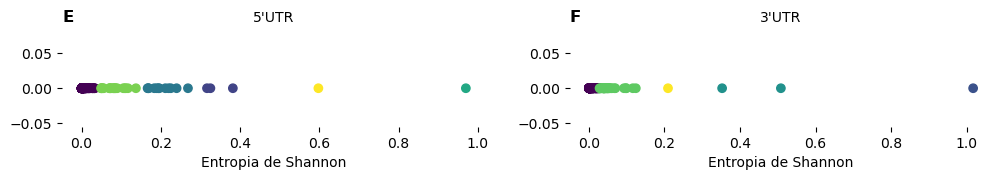

In [5]:
fig = plt.figure(figsize=(12, 1))
gs = gridspec.GridSpec(1, 2, height_ratios=[5], width_ratios=[4, 4])

# 5 UTR
ax1 = fig.add_subplot(gs[0, 0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

data = np.array(list(df5['H'])).reshape(-1, 1)

kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

ax1 = plt.scatter(data, [0]*len(data), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Entropia de Shannon')
plt.title('E', fontweight="bold", loc = 'left')
plt.title("5'UTR", fontsize=10, pad=20)

#3 UTR
ax2 = fig.add_subplot(gs[0, 1])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

data = np.array(list(df3['H'])).reshape(-1, 1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

ax2 = plt.scatter(data, [0]*len(data), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Entropia de Shannon')



plt.title('F', fontweight="bold", loc = 'left')
plt.title("3'UTR", fontsize=10, pad=20)
plt.savefig('../Plots/Clusterizacion.pdf', bbox_inches='tight')

In [17]:
df_global = discret_entropy(df5,df3)
df_global

{5: 0.5977368400755773, 2: 0.3412431411545566, 1: 0.2027176344860939, 4: 0.08160508855653899, 0: 0.003725398058485177, 3: 0.970005423973176}
{0: 'High-conserved', 4: 'Conserved', 1: 'Semi-conserved', 2: 'Variable', 5: 'Variable', 3: 'Variable'}
{0: 0.00626216134073549, 3: 0.04712956146192826, 1: 1.0171981139277713, 4: 0.2812226520667611, 2: 0.5083763634654445}
{0: 'High-conserved', 3: 'Conserved', 4: 'Semi-conserved', 2: 'Variable', 1: 'Variable'}


/tmp/ipykernel_7801/1203622949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5z['H'] = list(map(float, df5z['H']))
/tmp/ipykernel_7801/1203622949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3z['H'] = list(map(float, df3z['H']))
/tmp/ipykernel_7801/1203622949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
29898,29899,0.039416,3'UTR,Global,Conserved
29899,29900,0.021050,3'UTR,Global,High-conserved
29900,29901,0.021770,3'UTR,Global,High-conserved
29901,29902,0.030551,3'UTR,Global,Conserved


In [18]:
df_v = discret_entropy(df5v,df3v)
df_v

{5: 0.7084095260114143, 2: 0.2250140897448696, 1: 0.439722520686502, 4: 0.07273511399674713, 0: 0.002427695968547005, 3: 0.9685768474668018}
{0: 'High-conserved', 4: 'Conserved', 2: 'Semi-conserved', 1: 'Variable', 5: 'Variable', 3: 'Variable'}
{0: 0.004742191765357144, 4: 0.08799249927063828, 3: 0.853134146640421, 2: 0.2909748153195987, 1: 0.5187677445607339}
{0: 'High-conserved', 4: 'Conserved', 2: 'Semi-conserved', 1: 'Variable', 3: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Semi-conserved
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
1136346,29899,-0.000000,3'UTR,recombinant,High-conserved
1136347,29900,-0.000000,3'UTR,recombinant,High-conserved
1136348,29901,-0.000000,3'UTR,recombinant,High-conserved
1136349,29902,-0.000000,3'UTR,recombinant,High-conserved


In [19]:
df_t = discret_entropy(df5t,df3t)
df_t

{2: 0.6037059347503783, 5: 0.3801182042999713, 3: 0.1983448116188465, 0: 0.07877248058533148, 1: 0.0037312371498526933, 4: 0.8701234728971992}
{1: 'High-conserved', 0: 'Conserved', 3: 'Semi-conserved', 5: 'Variable', 2: 'Variable', 4: 'Variable'}
{0: 0.007374214473779332, 3: 0.07738751857400905, 4: 0.8878797487504948, 2: 0.3033201944617004, 1: 0.6096229529101063}
{0: 'High-conserved', 3: 'Conserved', 2: 'Semi-conserved', 1: 'Variable', 4: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
299034,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299035,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299036,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299037,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


In [21]:
#m = pd.pivot(df, values = 'Group', index='Variant', columns = 'Site')
#m.head()

In [22]:
#m.to_csv('../Data/matrix_conserved_variants.tsv', sep = '\t')
df_t.to_csv('../Data/ConservedRegions_kmeans_t.tsv', index = False, sep  = '\t')
df_v.to_csv('../Data/ConservedRegions_kmeans_v.tsv', index = False, sep  = '\t')

# Inspection

In [15]:
df_t = pd.read_csv('../Data/ConservedRegions_kmeans_t.tsv', sep = '\t')
df_v = pd.read_csv('../Data/ConservedRegions_kmeans_v.tsv', sep = '\t')

In [25]:
df_vc = df_v[df_v['Group']=='High-conserved']
df_vc

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
19261,29899,-0.000000,3'UTR,recombinant,High-conserved
19262,29900,-0.000000,3'UTR,recombinant,High-conserved
19263,29901,-0.000000,3'UTR,recombinant,High-conserved
19264,29902,-0.000000,3'UTR,recombinant,High-conserved


In [31]:
pd.DataFrame(df_vc.groupby(['Variant'])['Variant'].value_counts()).std()

Variant    15.951216
dtype: float64

In [35]:
df_vcr = pd.DataFrame(df_vc.groupby(['Variant'])[['Variant', 'Region']].value_counts()).reset_index()
df_vcr.groupby('Region').agg(['mean', 'std'])

0           
              mean        std
Region                       
3'UTR   211.128205  10.998037
5'UTR   249.948718   8.596048

In [36]:
df_tc = df_t[df_t['Group']=='High-conserved']
df_tc

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
5429,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5430,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5431,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5432,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


In [39]:
pd.DataFrame(df_tc.groupby(['Variant'])['Variant'].value_counts()).std()

Variant    17.772297
dtype: float64

In [41]:
df_tcr = pd.DataFrame(df_tc.groupby(['Variant'])[['Variant', 'Region']].value_counts()).reset_index()
df_tcr.groupby('Region').agg(['mean', 'std'])

0           
              mean        std
Region                       
3'UTR   200.727273  10.808246
5'UTR   246.909091  10.783826